In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/pc/Desktop/face detection/facial/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'C:/Users/pc/Desktop/face detection/facial/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 398 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\pc\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Train the model
history = model.fit(train_generator, epochs=30, validation_data=test_generator)

# Save the model after training
model.save('final_model.keras')  # Save in the `.keras` format
model.save('final_model.h5')  # Save in the `.h5` format



Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8465 - loss: 0.5342 - val_accuracy: 0.3600 - val_loss: 2.6097
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8841 - loss: 0.4384 - val_accuracy: 0.3200 - val_loss: 3.0463
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8923 - loss: 0.3845 - val_accuracy: 0.3600 - val_loss: 2.9937
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8864 - loss: 0.3410 - val_accuracy: 0.3400 - val_loss: 3.6404
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9082 - loss: 0.3188 - val_accuracy: 0.3800 - val_loss: 3.8136
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9323 - loss: 0.2459 - val_accuracy: 0.3700 - val_loss: 3.6451
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9381 - loss: 0.2320 - val_accuracy: 0.4000 - val_loss: 4.1988
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9588 - loss: 0.1862 - val_accuracy: 0.4500 - val_loss:

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('final_model.keras')  # Or 'best_model.keras' if you used that file name

# Path to the image for prediction
img_path = 'C:/Users/pc/Desktop/face detection/facial/test/eksim/ek54_jpg.rf.3b79f013f97711cdb2b27c1e430f05b5.jpg'

# Preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to the same size as your training images
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 224, 224, 3)

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)  # Get the index of the highest prediction

# Map the predicted class index to the corresponding class label
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse the class_indices dictionary
predicted_class_name = class_labels[predicted_class]

print(f'Predicted class: {predicted_class_name}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted class: rosacea


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step- accuracy: 0.9604 - loss
 - F1 Score: 0.1663
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9604 - loss: 0.1615 - val_accuracy: 0.3100 - val_loss: 5.0050
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step- accuracy: 0.9507 - loss: 
 - F1 Score: 0.2577
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9512 - loss: 0.1162 - val_accuracy: 0.3800 - val_loss: 5.8739
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step- accuracy: 0.9846 - loss: 
 - F1 Score: 0.2134
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9838 - loss: 0.0842 - val_accuracy: 0.3400 - val_loss: 4.8113
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step- accuracy: 0.9795 - loss: 
 - F1 Score: 0.2047
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9792 - loss: 0.1000 - val_accuracy: 0.3800 - val_loss: 7.0218
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step- accuracy: 0.9740 - loss: 
 - F1 Score: 0.1710
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9735

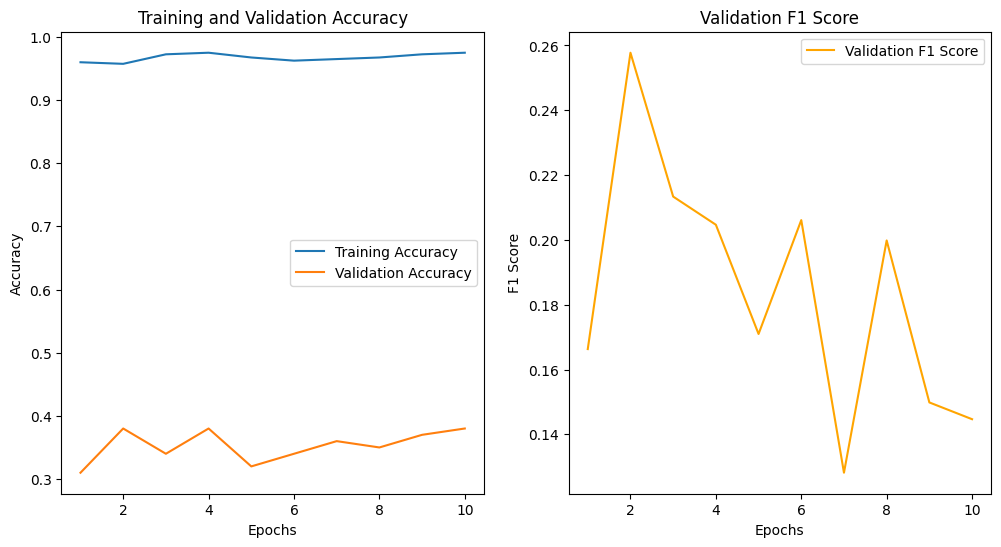

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback

# Custom callback to calculate F1 score after each epoch
class F1ScoreCallback(Callback):
    def __init__(self, test_generator):
        super().__init__()
        self.test_generator = test_generator
        self.f1_scores = []
        
    def on_epoch_end(self, epoch, logs=None):
        # Get true labels and predictions
        y_true = self.test_generator.classes
        y_pred = np.argmax(self.model.predict(self.test_generator), axis=1)
        
        # Calculate F1 score
        f1 = f1_score(y_true, y_pred, average='weighted')
        self.f1_scores.append(f1)
        print(f' - F1 Score: {f1:.4f}')

# Instantiate the F1ScoreCallback
f1_callback = F1ScoreCallback(test_generator=test_generator)

# Train the model with accuracy and F1 score tracking
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[f1_callback]
)

# Plot accuracy and F1 score
def plot_metrics(history, f1_scores):
    epochs = range(1, len(history.history['accuracy']) + 1)
    
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot F1 score
    plt.subplot(1, 2, 2)
    plt.plot(epochs, f1_scores, label='Validation F1 Score', color='orange')
    plt.title('Validation F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

    plt.show()

# Plot the metrics
plot_metrics(history, f1_callback.f1_scores)


In [27]:
# Assuming you already have the model and prediction code in place

# Map the class indices to class names
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse the dictionary

# Get the predicted class index
predicted_class = np.argmax(prediction)

# Get the corresponding class name
predicted_class_name = class_labels[predicted_class]

print(f'Predicted class: {predicted_class_name}')


Predicted class: rosacea


NameError: name 'best_model' is not defined